In this file, we will extract variables of interests and control variables that will be use for building the risk table of cognitive decline in different occupation subgroups.

In [1]:
## Scientific Computing with Python
import pyreadstat as pr
import pandas as pd
import numpy as np

## Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

## File dirtectory
import os
import gc

# 1. Read the Data and Extract Columns of Interests

In [2]:
## Import Variables of Interest Saved in Pipleine/varList.py
import Pipeline.varList
varComplete = Pipeline.varList.varComplete
varInterest = Pipeline.varList.interestVars

In [4]:
## Import Variales of Interest in every row
from Pipeline.unPivot import *

hrsFull = pr.pyreadstat.read_sas7bdat(
    filename_path = "../../Data/randhrs1992_2022v1.sas7bdat",
    usecols = varComplete,
    metadataonly = False
)[0]

In [5]:
## Convert to Wide Format
import Pipeline.unPivot as up

# Convert to long Format
fileNameAll = "../Data/joinedHRSALL.csv"
fileNameWave = "../Data/joinedHRSWAVE.csv"
up.unPivotSelectedVars(hrsFull, varInterest, fileNameAll, fileNameWave, idCol="HHIDPN")

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\unPivot.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetDf.dropna(axis = 0, how = "all", inplace = True)


In [6]:
del hrsFull
gc.collect()

20

# 2. Data Cleaning

In [1]:
from Pipeline.cleanVarGroups import hrsSet
from Pipeline.varList import *

fileNameAll = "../Data/joinedHRSALL.csv"
fileNameWave = "../Data/joinedHRSWAVE.csv"
## Import long format data
hrsAll = pd.read_csv(fileNameAll, low_memory=False)
hrsWave = pd.read_csv(fileNameWave, low_memory=False)
hrsCombo = hrsSet(hrsAll, hrsWave) ## Creat the hrsCombo class

NameError: name 'pd' is not defined

## 2.1 Subset Rows with non-null important columns

In [8]:
## Extract rows with non-null repesonse
hrsCombo = hrsSet(hrsAll, hrsWave)
hrsCombo.extractNonNull("all")
print(hrsCombo.Wave.shape)

gc.collect()

(145625, 54)


31

## 2.2 Combining Cluttered Columns

In [15]:
len(hrsCombo.Wave.columns)

44

In [ ]:
## Combining functional limitation variables
physicalLimitVars = [
    "RwWALKR", # Diff-Walk across room. p878,905 [catgeorical variable]
    "RwDRESS", # Diff-Dressing. p883 [catgeorical variable]
    "RwBATH", # Diff-Bathing or showering. p887 [catgeorical variable]
    "RwEAT", # Diff-Eating. p891 [catgeorical variable]
    "RwBED", # Diff-Get in/out of bed. p895 [catgeorical variable]
    "RwTOILT", #Diff-Using the toilet. p900 [catgeorical variable]
    "RwMEALS"]

cognLimitVars = [
    "RwMAP", # Diff-Use a map. p950 [catgeorical variable]
    "RwPHONE", # Diff-Use telephone(no data for wave 1 but good for wave 2 to 16) p954 [catgeorical variable]
    "RwMONEY", # Diff-Managing money(no data for wave 1 but good for wave 2 to 16) p958 [catgeorical variable]
    "RwMEDS", # Diff-Take medications(no data for wave 1 but good for wave 2 to 16) p961 [catgeorical variable]
    "RwSHOP"]

hrsCombo.combineColumns("RwPhyLim", physicalLimitVars, method = "any")
hrsCombo.combineColumns("RwCogLim", cognLimitVars, method = "any")
hrsCombo.Wave.drop(physicalLimitVars + cognLimitVars, inplace=True)

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave[newColName] = self.Wave[colList].any(axis=1)
c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave.drop(columns = colList, inplace = True)
c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025

KeyError: "['RwWALKR', 'RwDRESS', 'RwBATH', 'RwEAT', 'RwBED', 'RwTOILT', 'RwMEALS', 'RwMAP', 'RwPHONE', 'RwMONEY', 'RwMEDS', 'RwSHOP'] not found in axis"

In [16]:
hrsCombo.Wave[["RwPhyLim", "RwCogLim"]].head(20)

,RwPhyLim,RwCogLim
18,False,True
20,False,True
34,False,False
37,False,False
38,False,False
39,False,False
40,False,False
41,False,False
42,True,False
50,False,False


## 2.3 Basic Preprocessing-----Scaling, Astype, Mapping

In [ ]:
# Log transform finance variables
financeVars = financials
hrsCombo.logFinance(financeVars)

## Standardize years of age in 
ageVars = ["RwAGEM_B"]
hrsCombo.standardizeAge(ageVars)

# ## Recode sibling and children every born
sibChildMapper = lambda x: 0 if x <= 3 else 1 if x <= 8 else 2 if x <= 13 else x
hrsCombo.discretize(sibChildMapper, ["RwLIVBRO", "RAEVBRN"])

# Recode work requirement variables
workReqMapper = lambda x: 1 if x <= 2 else 0 if x <= 5 else x
workReqList = ["RwJPHYS", "RwJLIFT",  "RwJSTRES", "RwJSTOOP", "RwJSIGHT"]
hrsCombo.discretize(workReqMapper, workReqList)

# Recode medical conditions
medCondMapper = lambda x: 1 if x in [1, 3, 5] else  0 if x in [2,4,6] else x
hrsCombo.discretize(medCondMapper, medicalConds)


## Cast integer-valued variables to int
intVars = ["RwLIVBRO", "RAEVBRN", "RwAGE_B", "RwAGE_B2", "RwAGE_B3"]
hrsCombo.castType(intVars, "category")

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave[var] = self.Wave[var].astype(dtype)


In [ ]:
hrsCombo.All["RAEVBRN"] = hrsCombo.All["RAEVBRN"].map(sibChildMapper)
hrsCombo.All["RAEVBRN"] = hrsCombo.All["RAEVBRN"].astype("category")
hrsCombo.All["RAEVBRN"].describe()

count     43261.0
unique        3.0
top           0.0
freq      32406.0
Name: RAEVBRN, dtype: float64

In [78]:
hrsCombo.castType(["RwCENREG", "RwMSTAT"], "category")

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave[var] = self.Wave[var].astype(dtype)


<Axes: >

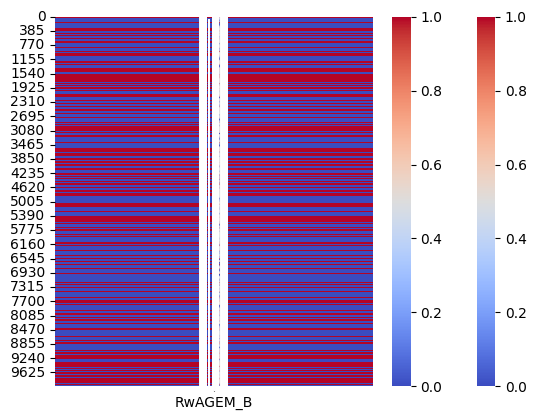

In [ ]:
# hrsWave.describe()
## Double check if financial variables are acquired and transformed corretly
 

# hrsCombo.Wave[["HHIDPN", "Wave"] + financeVars].head(20)
# hrsWave[["HHIDPN", "Wave"] + financeVars].head(20)

# sns.histplot(hrsWave[financeVars[0]], kde=True, bins=50)

# sns.heatmap(hrsWave[ageVars][0:10000].isnull(), annot=True, cmap='coolwarm', fmt='.2f')
# sns.heatmap(hrsCombo.Wave[ageVars][0:10000].isnull(), annot=True, cmap='coolwarm', fmt='.2f')



## 2.4 Cluster job occupation codes between different census

In [20]:
class hrsSet:
    def __init__(self, hrsAll, hrsWave):
        '''
        hrsAll is a DataFrame containing all variables that are not specific to any single wave.
        hrsWave is a DataFrame containing variables that are specific to every wave.
        '''
        self.All = hrsAll
        self.Wave = hrsWave

    def logFinance(self, financeVars):
        """
        Transform financial variables to log scale.
        """    
        for var in financeVars:
            if var in self.Wave.columns:
                self.Wave[var] = self.Wave[var].apply(lambda x: 
                                                      np.log1p(np.add(x, 1)) 
                                                      if pd.notnull(x) else x)        
        return None


    def standardizeAge(self, ageVars):
        """
        Standardize age variables.
        """
        for var in ageVars:
            if var in self.Wave.columns:
                self.Wave[var] = (self.Wave[var] - 65) / 12   
        return None
    
    def discretize(self, mapper, varList):
        '''
        Discretize continuous or discrete variables of many values into a simpler value structure.

        Parameters:
        mapper (dict): A lambda function that maps the original values to new values.
        varList (list): A list of variable names to be discretized.
        '''
        for var in varList:
            if var in self.Wave.columns:
                self.Wave[var] = self.Wave[var].map(mapper)
                self.Wave[var] = self.Wave[var].astype('category')


    def castType(self, varList, dtype):
        """
        Cast the type of variables in varList to the specified dtype.
        
        Parameters:
        varList (list): A list of variable names to be casted.
        dtype: The target data type to cast the variables to.
        """
        for var in varList:
            if var in self.Wave.columns:
                self.Wave[var] = self.Wave[var].astype(dtype)
        
        return None
    
    def groupOccupations(self):
        """
        Creates the new column in self.Wave called "RwJOCCSD", with all occupations 
        Drop the old occupation column list "RwOCC" if it exists.
        Relabel occupation variables based on a mapping dictionary.
        
        Parameters:
        occupationMap (dict): A dictionary mapping old occupation codes to new labels.
        """
        ## Map numbers to occupation names in different census years
        self.Wave["RwJCOCC"] = self.Wave["RwJCOCC"].map(occLookUp.occupation_1980)
        self.Wave["RwJCOCCA"] = self.Wave["RwJCOCCA"].map(occLookUp.occupation_ahead)
        self.Wave["RwJCOCCB"] = self.Wave["RwJCOCCB"].map(occLookUp.occupation_2000)
        self.Wave["RwJCOCCC"] = self.Wave["RwJCOCCC"].map(occLookUp.occupation_2010)
        
        ## Map occupation codes to standardized groups
        allOccs = ["RwJCOCC", "RwJCOCCA", "RwJCOCCB", "RwJCOCCC"]
        self.Wave[allOccs] = self.Wave[allOccs].apply(
            lambda x: x.map(occLookUp.codeToGroup),
            axis=0
        )
        print("Occupation codes across waves are:")
        print(self.Wave[allOccs].head(10))

        ## Take the most common occupation grouping across all waves as the final occupation
        self.Wave["RwJOCCSD"] = self.Wave[allOccs].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, 
                                                         axis=1) 
        # print(self.Wave["RwJOCCSD"].head(10))      
        # # ## Drop the old occupation columns if they exist
        self.Wave.drop(columns=allOccs, inplace=True)
                
        return None

    def combineColumns(self, newColName, colList, method = "all", combFunc = None):
        """
        Combine multiple columns into a single column by taking OR or AND operation.
        
        Parameters:
        newColName (str): The name of the new column to be created.
        colList (list): A list of column names to be combined.
        """
        if (method not in ["all", "any"]) and (combFunc is None):
            raise ValueError("Method is not 'all' or 'any', or combFunc is None.")
        elif method == "all":
            self.Wave[newColName] = self.Wave[colList].all(axis=1)
        elif method == "any":
            self.Wave[newColName] = self.Wave[colList].any(axis=1)
        else:
            self.Wave[newColName] = self.Wave[colList].apply(combFunc, axis = 0)
        
        self.Wave.drop(columns = colList, inplace = True)
        return None
    
    def extractNonNull(self, how):
        """
        Extract individuals with non-null cognition variables, RwTR20 and ReMSTOT, or non-null cognitive impairement
        For individyuals with part of their cognitive status null,  
        It imputes missing values with forward fill and back fill
        
        Returns: none
        Mutate: self.Wave
        """
        non_null_response = (
            self.Wave[['RwTR20', 'RwMSTOT']].notnull().all(axis=1) |
            self.Wave[["RwLOST", "RwWANDER", "RwALONE", "RwHALUC"]].notnull().all(axis=1)
        )
        self.Wave = self.Wave[non_null_response]
        

    def dealNAs(self, varList, fillValue=0):
        """
        Deal with missing values in the specified variables.
        
        Parameters:
        varList (list): A list of variable names to handle missing values for.
        fillValue: The value to fill in for missing values. Default is 0.
        """
        self.Wave.fillna(method='ffill', axis = 0, inplace = True)
        self.Wave.fillna(method='bfill', axis = 0, inplace = True)
        
        return None
    

In [ ]:
# from Pipeline.cleanVarGroups import hrsSet
# from Pipeline.varList import *

# ## File directory
# fileNameAll = "../Data/joinedHRSALL.csv"
# fileNameWave = "../Data/joinedHRSWAVE.csv"
# ## Import long format data
# hrsAll = pd.read_csv(fileNameAll, low_memory=False)
# hrsWave = pd.read_csv(fileNameWave, low_memory=False)

In [114]:
hrsCombo = hrsSet(hrsAll, hrsWave)
# hrsCombo.groupOccupations()
# hrsCombo.Wave["RwJOCCSD"].describe()

In [21]:
# hrsCombo.Wave["RwJCOCCSD"] = hrsCombo.Wave[["RwJCOCC", "RwJCOCCA", "RwJCOCCB", "RwJCOCCC"]].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, 
#                                                          axis=1) 
# hrsCombo.Wave["RwJCOCCSD"].describe()
hrsCombo.groupOccupations()

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave["RwJCOCC"] = self.Wave["RwJCOCC"].map(occLookUp.occupation_1980)
c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave["RwJCOCCA"] = self.Wave["RwJCOCCA"].map(occLook

Occupation codes across waves are:
                             RwJCOCC RwJCOCCA RwJCOCCB RwJCOCCC
18                               NaN      NaN      NaN      NaN
20                               NaN      NaN      NaN      NaN
34  Skilled Trades/Production/Manual      NaN      NaN      NaN
37  Skilled Trades/Production/Manual      NaN      NaN      NaN
38  Skilled Trades/Production/Manual      NaN      NaN      NaN
39                               NaN      NaN      NaN      NaN
40                               NaN      NaN      NaN      NaN
41                               NaN      NaN      NaN      NaN
42                               NaN      NaN      NaN      NaN
50                             Sales      NaN      NaN      NaN


c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave["RwJOCCSD"] = self.Wave[allOccs].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan,
c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave.drop(columns=allOccs, inplace=True)


In [26]:
print(hrsCombo.Wave.info())
print(hrsCombo.Wave.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 145625 entries, 18 to 723740
Data columns (total 41 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   HHIDPN    145625 non-null  int64   
 1   Wave      145625 non-null  int64   
 2   RwTR20    131586 non-null  float64 
 3   RwMSTOT   131586 non-null  float64 
 4   RwLOST    14042 non-null   float64 
 5   RwWANDER  14042 non-null   float64 
 6   RwALONE   14042 non-null   float64 
 7   RwHALUC   14042 non-null   float64 
 8   RwWORK    145126 non-null  float64 
 9   RwJHOURS  36596 non-null   float64 
 10  RwWGIHR   32800 non-null   float64 
 11  RwJPHYS   36176 non-null   category
 12  RwJLIFT   36184 non-null   category
 13  RwJSTRES  36615 non-null   category
 14  RwJSTOOP  36177 non-null   category
 15  RwJSIGHT  36467 non-null   category
 16  RwCENREG  145543 non-null  float64 
 17  RwMSTAT   145474 non-null  float64 
 18  RwAGEM_B  145625 non-null  float64 
 19  RwLIVBRO  145017 non-null  

In [24]:
print(hrsCombo.All.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45234 entries, 0 to 45233
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HHIDPN    45234 non-null  float64
 1   RAGENDER  45234 non-null  float64
 2   RARACEM   44626 non-null  float64
 3   RAEDYRS   44585 non-null  float64
 4   RAEVBRN   43261 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB
None


## 2.5 Combine Cognitive Impairment

In [37]:
hrsCombo.Wave.reset_index(inplace = True)

In [57]:
## New Column: any cognitive impairement
anyCogImp = lambda x: 1 if x.iloc[[0,1,3]].any() or not x.iloc[2] else 0
cogImpCols = ["RwLOST", "RwWANDER", "RwALONE", "RwHALUC"]
hrsCombo.Wave["RwAnyCogImp"] = hrsCombo.Wave[cogImpCols].apply(anyCogImp, axis = 1)
print(hrsCombo.Wave["RwAnyCogImp"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 145625 entries, 0 to 145624
Series name: RwAnyCogImp
Non-Null Count   Dtype
--------------   -----
145625 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB
None


C:\Users\86139\AppData\Local\Temp\ipykernel_24824\903573425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrsCombo.Wave["RwAnyCogImp"] = hrsCombo.Wave[cogImpCols].apply(anyCogImp, axis = 1)


## 2.6 Fill in "Retired" Occupation for those not working

In [69]:
retireIdx = hrsCombo.Wave["RwJOCCSD"].isnull() & (hrsCombo.Wave["RwWORK"] == 0)
hrsCombo.Wave["RwJOCCSD"][retireIdx] = "Retired"
hrsCombo.Wave["RwJOCCSD"].unique()

C:\Users\86139\AppData\Local\Temp\ipykernel_24824\3074999204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrsCombo.Wave["RwJOCCSD"][retireIdx] = "Retired"
C:\Users\86139\AppData\Local\Temp\ipykernel_24824\3074999204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrsCombo.Wave["RwJOCCSD"][retireIdx] = "Retired"


array(['Retired', 'Skilled Trades/Production/Manual', 'Sales',
       'Management/Clerical/Business', 'STEM/Professional/Technical',
       'High Risk Occupations', 'Healthcare', 'Food/Personal/Service',
       nan, 'Farming/Forestry/Fishing'], dtype=object)

In [73]:
print(hrsCombo.Wave["RwJOCCSD"].info())
hrsCombo.Wave["RwJOCCSD"] = hrsCombo.Wave["RwJOCCSD"].astype("category")

<class 'pandas.core.series.Series'>
RangeIndex: 145625 entries, 0 to 145624
Series name: RwJOCCSD
Non-Null Count   Dtype 
--------------   ----- 
144672 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


C:\Users\86139\AppData\Local\Temp\ipykernel_24824\405697636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrsCombo.Wave["RwJOCCSD"] = hrsCombo.Wave["RwJOCCSD"].astype("category")


## 2.7 Inspect Health Behaviours and Medical Conditions

In [83]:
# Health behviours
print(hrsCombo.Wave[["RwHSWRRF",
    "RwVIGACT",
    "RwLTACTF",
    "RwSMOKEV",
    "RwDRINK"]].describe())

       RwHSWRRF      RwVIGACT  RwLTACTF       RwSMOKEV        RwDRINK
count       0.0  53299.000000       0.0  144414.000000  145592.000000
mean        NaN      0.395204       NaN       0.566296       0.470761
std         NaN      0.488899       NaN       0.495587       0.499146
min         NaN      0.000000       NaN       0.000000       0.000000
25%         NaN      0.000000       NaN       0.000000       0.000000
50%         NaN      0.000000       NaN       1.000000       0.000000
75%         NaN      1.000000       NaN       1.000000       1.000000
max         NaN      1.000000       NaN       1.000000       1.000000


In [86]:
#  RwHSWRRF, RwLTACTF have no values, we will drop them out
hrsCombo.Wave.drop(labels = ["RwHSWRRF", "RwLTACTF"], axis = 1, inplace = True)
print(hrsCombo.Wave.shape)

(145625, 41)


C:\Users\86139\AppData\Local\Temp\ipykernel_24824\343863387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrsCombo.Wave.drop(labels = ["RwHSWRRF", "RwLTACTF"], axis = 1, inplace = True)


In [ ]:
## Inspect Health Behaviours
print(hrsCombo.Wave[['RwHIBP', 'RwDIAB', 'RwCANCR', 'RwLUNG',
       'RwHEART', 'RwSTROK', 'RwPSYCH', 'RwARTHR']].describe())


          RwHIBP    RwDIAB   RwCANCR    RwLUNG   RwHEART   RwSTROK   RwPSYCH  \
count   145399.0  145503.0  145516.0  145509.0  145490.0  145528.0  145449.0   
unique       2.0       2.0       2.0       2.0       2.0       2.0       2.0   
top          1.0       0.0       0.0       0.0       0.0       0.0       0.0   
freq     86230.0  114717.0  122242.0  129427.0  104435.0  133083.0  122054.0   

         RwARTHR  
count   145426.0  
unique       2.0  
top          1.0  
freq     88998.0  


I don't think there is a need to re-organize levels of the health behaviours

## 2.8 Impute Missing Data

In [91]:
print(hrsCombo.All.isnull().sum())

HHIDPN         0
RAGENDER       0
RARACEM      608
RAEDYRS      649
RAEVBRN     1973
dtype: int64


C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'index'),
  Text(1, 0, 'HHIDPN'),
  Text(2, 0, 'Wave'),
  Text(3, 0, 'RwTR20'),
  Text(4, 0, 'RwMSTOT'),
  Text(5, 0, 'RwLOST'),
  Text(6, 0, 'RwWANDER'),
  Text(7, 0, 'RwALONE'),
  Text(8, 0, 'RwHALUC'),
  Text(9, 0, 'RwWORK'),
  Text(10, 0, 'RwJHOURS'),
  Text(11, 0, 'RwWGIHR'),
  Text(12, 0, 'RwJPHYS'),
  Text(13, 0, 'RwJLIFT'),
  Text(14, 0, 'RwJSTRES'),
  Text(15, 0, 'RwJSTOOP'),
  Text(16, 0, 'RwJSIGHT'),
  Text(17, 0, 'RwCENREG'),
  Text(18, 0, 'RwMSTAT'),
  Text(19, 0, 'RwAGEM_B'),
  Text(20, 0, 'RwLIVBRO'),
  Text(21, 0, 'RwHIBP'),
  Text(22, 0, 'RwDIAB'),
  Text(23, 0, 'RwCANCR'),
  Text(24, 0, 'RwLUNG'),
  Text(25, 0, 'RwHEART'),
  Text(26, 0, 'RwSTROK'),
  Text(27, 0, 'RwPSYCH'),
  Text(28, 0, 'RwARTHR'),
  Text(29, 0, 'RwEARN'),
  Text(30, 0, 'RwITOT'),
  Text(31, 0, 'RwATR

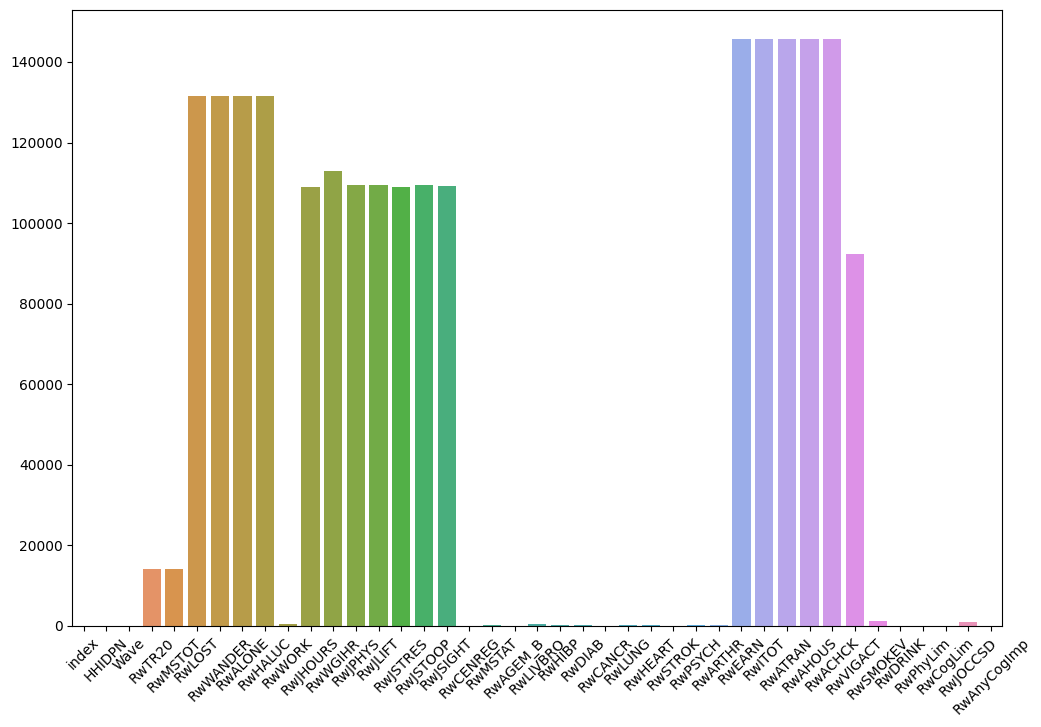

In [ ]:
waveMissingness = hrsCombo.Wave.isnull().sum()
plt.figure(figsize=(12, 8))
sns.barplot(x = waveMissingness.index.to_list(),
            y = waveMissingness)
plt.xticks(rotation=45)

In [98]:
# Read selected columns from the CSV using pyreadstat
selected_cols = ["RwARTHR", "RwEARN", "RwITOT", "RwAHOUS", "RwACHCK"]
hrsWave_selected= pd.read_csv(
    "../Data/joinedHRSWAVE.csv",
    usecols=selected_cols
)
print(hrsWave_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723744 entries, 0 to 723743
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   RwARTHR  291608 non-null  float64
 1   RwEARN   0 non-null       float64
 2   RwITOT   0 non-null       float64
 3   RwAHOUS  0 non-null       float64
 4   RwACHCK  0 non-null       float64
dtypes: float64(5)
memory usage: 27.6 MB
None


In [99]:
## remove unwanted column
# hrsCombo.Wave.drop(labels = ["index"], axis = 1, inplace = True)

# Remove columns with over 90% missing data
hrsCombo.Wave.drop(labels = ["RwARTHR", "RwEARN", "RwITOT", "RwAHOUS",
                             "RwACHCK"], axis = 1, inplace = True)

C:\Users\86139\AppData\Local\Temp\ipykernel_24824\2434036932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrsCombo.Wave.drop(labels = ["RwARTHR", "RwEARN", "RwITOT", "RwAHOUS",


In [100]:
del hrsWave_selected
gc.collect()

3925

C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'index'),
  Text(1, 0, 'HHIDPN'),
  Text(2, 0, 'Wave'),
  Text(3, 0, 'RwTR20'),
  Text(4, 0, 'RwMSTOT'),
  Text(5, 0, 'RwLOST'),
  Text(6, 0, 'RwWANDER'),
  Text(7, 0, 'RwALONE'),
  Text(8, 0, 'RwHALUC'),
  Text(9, 0, 'RwWORK'),
  Text(10, 0, 'RwJHOURS'),
  Text(11, 0, 'RwWGIHR'),
  Text(12, 0, 'RwJPHYS'),
  Text(13, 0, 'RwJLIFT'),
  Text(14, 0, 'RwJSTRES'),
  Text(15, 0, 'RwJSTOOP'),
  Text(16, 0, 'RwJSIGHT'),
  Text(17, 0, 'RwCENREG'),
  Text(18, 0, 'RwMSTAT'),
  Text(19, 0, 'RwAGEM_B'),
  Text(20, 0, 'RwLIVBRO'),
  Text(21, 0, 'RwHIBP'),
  Text(22, 0, 'RwDIAB'),
  Text(23, 0, 'RwCANCR'),
  Text(24, 0, 'RwLUNG'),
  Text(25, 0, 'RwHEART'),
  Text(26, 0, 'RwSTROK'),
  Text(27, 0, 'RwPSYCH'),
  Text(28, 0, 'RwATRAN'),
  Text(29, 0, 'RwVIGACT'),
  Text(30, 0, 'RwSMOKEV'),
  Text(31, 0, 'RwDRINK'),
  Text(32,

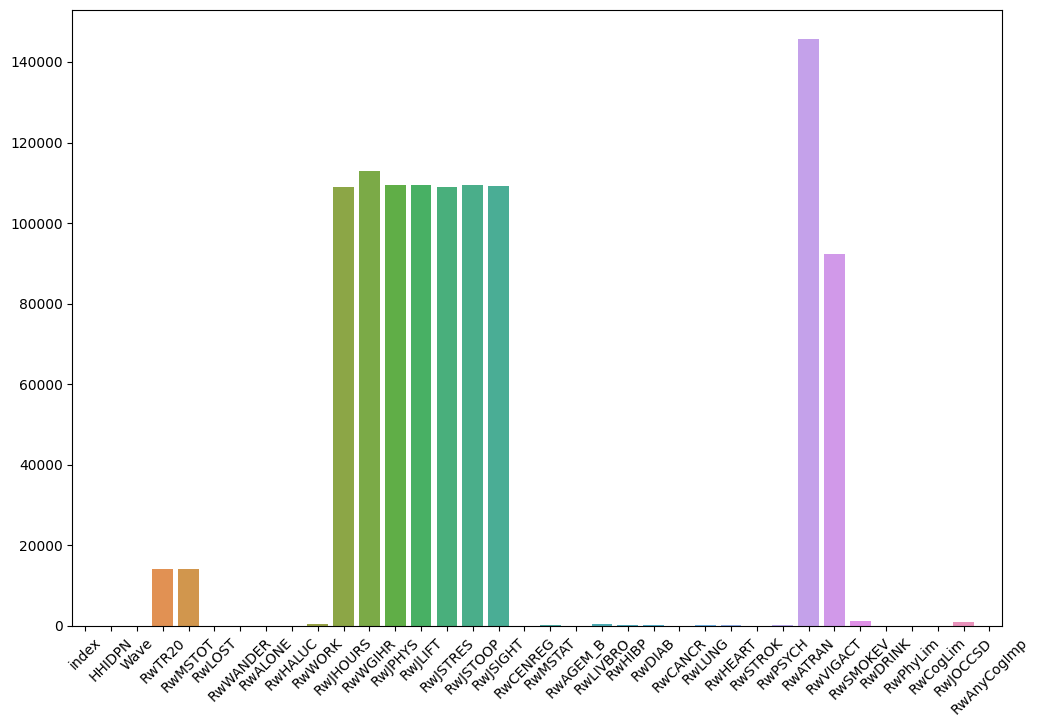

In [111]:
waveMissingness = hrsCombo.Wave.isnull().sum()
plt.figure(figsize=(12, 8))
sns.barplot(#data = waveMissingness, 
            x = waveMissingness.index.to_list(),
            y = waveMissingness)
plt.xticks(rotation=45)

In [ ]:
# hrsCombo.Wave[['RwLOST', 'RwWANDER', 'RwHALUC']] = hrsCombo.Wave[['RwLOST', 'RwWANDER', 'RwHALUC']].fillna(0)
# hrsCombo.Wave[['RwALONE']] = hrsCombo.Wave[['RwALONE']].fillna(1)
# hrsCombo.Wave[['RwLOST', 'RwWANDER', 'RwALONE', 'RwHALUC']]
# hrsCombo.Wave.drop(labels=['RwLOST', 'RwWANDER', 'RwALONE', 'RwHALUC'], inplace = True)

KeyError: "['RwLOST', 'RwWANDER', 'RwALONE', 'RwHALUC'] not found in axis"

In [113]:
fillCols = ["RwCENREG", "RwAGEM_B", "RwLIVBRO", "RwHIBP", "RwLUNG", "RwHEART", "RwSTROK",
 "RwVIGACT", "RwCogLim"]

hrsCombo.Wave[fillCols] = hrsCombo.Wave[fillCols].fillna(method = "bfill")
hrsCombo.Wave[fillCols] = hrsCombo.Wave[fillCols].fillna(method = "ffill")

C:\Users\86139\AppData\Local\Temp\ipykernel_24824\1042440367.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hrsCombo.Wave[fillCols] = hrsCombo.Wave[fillCols].fillna(method = "bfill")
C:\Users\86139\AppData\Local\Temp\ipykernel_24824\1042440367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrsCombo.Wave[fillCols] = hrsCombo.Wave[fillCols].fillna(method = "bfill")
C:\Users\86139\AppData\Local\Temp\ipykernel_24824\1042440367.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hrsCombo.Wave[fillCols] = hrsCombo.Wave[fillCols].fillna(method = "ffill")
C:\Users

In [115]:
hrsCombo.Wave.to_csv("../Data/hrsWaveCleaned.csv")

Disregard the code below

In [60]:
# cluster the occpations using KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import defaultdict

kList = list(range(2,20))
scoreDf = pd.DataFrame(index=kList, columns=["Silhouette Coefficient",
                                                "Calinski-Harabasz Index",
                                                "Davies-Bouldin Index"])

for cand_k in kList:
    kmeans = KMeans(
        n_clusters=cand_k,
        max_iter=100,
        n_init=5,
    )
    kmeans.fit_transform(occVecDf)

    # Evaluation
    scores = defaultdict(list)
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(occVecDf, kmeans.labels_, sample_size=2000)
    )
    scores["Calinski-Harabasz Index"].append(
        metrics.calinski_harabasz_score(occVecDf.toarray(), kmeans.labels_)
    )
    scores["Davies-Bouldin Index"].append(
        metrics.davies_bouldin_score(occVecDf.toarray(), kmeans.labels_)
    )
    scoreDf.loc[cand_k] = scores

print(scoreDf)
    

# kmeans = KMeans(
#         n_clusters=5,
#         max_iter=100,
#         n_init=5,
#     )
# kmeans.fit_transform(occVecDf)

# pd.DataFrame([kmeans.labels_, occupation_all_val], 
#             columns=["Cluster", "Occupation"]).sort_values(by="Cluster")



    Silhouette Coefficient Calinski-Harabasz Index  Davies-Bouldin Index
2   [0.022745607152715275]    [3.0370981156364616]    [3.54104696236505]
3    [0.03081662867670651]    [2.8252564274865346]  [3.2106343265678206]
4   [0.039682833980139894]    [2.6847786911762226]   [3.045267651545708]
5    [0.04801988293266492]      [2.62724817938636]    [2.60882403703404]
6   [0.058627779431467665]     [2.428234952378288]   [2.536915238121277]
7    [0.10452222479501164]    [2.5224072959403774]   [2.231701271979948]
8    [0.10272051718348224]     [2.353836328012539]   [2.392626274870912]
9    [0.12001456075116833]       [2.5157764578416]  [2.1709494616166753]
10   [0.11120262936618508]     [2.398690131400177]   [2.277385619560347]
11    [0.1437198597172155]     [2.360925985192082]  [2.1340424180026485]
12    [0.1584356019505785]    [2.4684980166652664]   [2.011379531147807]
13   [0.16002194387800786]     [2.541865876289422]   [2.046536702147852]
14   [0.17408897397435824]    [2.4232117072191173] 

1. Silhouette Coefficient calculates the separation of different clusters using mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The best value is 1, and the worst range is -1. The result shows that k=19 gives the best result
2. Calinski-Harabasz Index  quantifies the separation by taking the ratio of variance between clusters to the variance within clusters. The optimal K=2 is characterized by the highest CH value
3. Davies-Bouldin Index: the ratio of within cluster simialarity and with the most similar cluster. Lower ratio indicates better separation of classes. Optimal K is 19

We will set optimal to K = 15 to balance separation of cluster and parsimoneity

In [61]:
Optimal_K = 15
kmeans = KMeans(
        n_clusters=Optimal_K,
        max_iter=100,
        n_init=5,
    )
kmeans.fit_transform(occVecDf)

occCluster = pd.DataFrame({"Cluster": kmeans.labels_, "Occupation":occupation_all_val}).sort_values(by="Cluster")
print(occCluster.head(20))

    Cluster                Occupation
22        0  Operatives/kindred worke
37        1   Healthcare Support Occs
43        1  Office+Admin Support Occ
60        1  Healthcare Practitioners
61        1   Healthcare Support Occs
2         2                     Sales
20        2             Sales workers
42        2              Sales Occups
66        2        Sales+Related Occs
19        3  Clerical/kindred workers
46        3        Extraction Workers
24        3               Svc workers
8         3              Personal svc
7         3                Health svc
5         3            Svc:protection
4         3   Svc:prv hhld/clean/bldg
65        4  Personal Care+Service Oc
56        4  Community+Social Service
32        4  Community+Social Svcs Oc
38        4   Protective Service Occs


# 3. Ad-Hoc Data Fixes

## 3.1 Adding Detailed Cognitive Impairment

In [ ]:
hrsWaveC = pd.read_csv("../Data/hrsWaveCleaned.csv")
hrsWaveO = pd.read_csv("../Data/joinedHRSWAVE.csv")

colToFix = [
    "RwLOST", # cognitive impairment: getting lost
    "RwWANDER", # cognitive impairment: wandering off
    "RwHALUC", # halucination
    "RwALONE", # cognitive impairment: left alone
    
    "RwEARN", # Individual earnings
    "RwITOT", # Total household income
    "RwATRAN", # Net value of viehicles
    "RwAHOUS", # Net value of house
    "RwACHCK", # Net value of checking accounts
    ]
print(hrsWaveO[colToFix].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723744 entries, 0 to 723743
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RwLOST    14400 non-null  float64
 1   RwWANDER  14537 non-null  float64
 2   RwHALUC   14332 non-null  float64
 3   RwALONE   14585 non-null  float64
 4   RwEARN    0 non-null      float64
 5   RwITOT    0 non-null      float64
 6   RwATRAN   0 non-null      float64
 7   RwAHOUS   0 non-null      float64
 8   RwACHCK   0 non-null      float64
dtypes: float64(9)
memory usage: 49.7 MB
None


In [18]:
print(hrsWaveO[colToFix].sum())

RwLOST       3699.0
RwWANDER     1040.0
RwHALUC      2714.0
RwALONE     11252.0
RwEARN          0.0
RwITOT          0.0
RwATRAN         0.0
RwAHOUS         0.0
RwACHCK         0.0
dtype: float64


In [ ]:
dfCogImp = hrsWaveO[["HHIDPN", "Wave"] + colToFix[0:4]]
dfCogImp["RwALONE"] = dfCogImp["RwALONE"].map({0:1, 1:0}) ## Revert it to "the old person cannot be left alone"
dfCogImp[colToFix[0:4]] = dfCogImp[colToFix[0:4]].fillna(0)

hrsWaveC = pd.merge(hrsWaveC, dfCogImp, how = "left", on = ["HHIDPN", "Wave"])
print(hrsWaveC["RwAnyCogImp"].info())
print(hrsWaveC[colToFix[0:4]].sum())

C:\Users\86139\AppData\Local\Temp\ipykernel_31100\1820321792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCogImp["RwALONE"] = dfCogImp["RwALONE"].map({0:1, 1:0}) ## Revert it to "the old person cannot be left alone"
C:\Users\86139\AppData\Local\Temp\ipykernel_31100\1820321792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCogImp[colToFix[0:4]] = dfCogImp[colToFix[0:4]].fillna(0)


<class 'pandas.core.series.Series'>
RangeIndex: 145625 entries, 0 to 145624
Series name: RwAnyCogImp
Non-Null Count   Dtype
--------------   -----
145625 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB
None
RwLOST      3510.0
RwWANDER     967.0
RwHALUC     2620.0
RwALONE     3087.0
dtype: float64


In [147]:
hrsWaveC.to_csv("../Data/hrsWaveCleaned.csv")

## 3.2 Adding Financial Variables

In [9]:
from Pipeline.unPivot import joinMetrics
from Pipeline.varList import selectMetricforAll, hrsColumns

financialVars = [
    "HwATOTB", ## Total wealth
    "HwADEBT", ## Debt
    "HwACHCK", ## Net value of chequing account
    "HwAMRTB", ## Mortage
    "HwITOT" ## Total Household income,R+Sp only
    ]
financialWave = ["H\\d+"+s[2:] + "$" for s in financialVars]
financialWave = selectMetricforAll(financialWave, hrsColumns)
print(financialWave)
hrsFull = pr.pyreadstat.read_sas7bdat(
    filename_path = "../../Data/randhrs1992_2022v1.sas7bdat",
    usecols = financialWave
)[0]

joinMetrics(hrsFull, financialVars, "../Data/joinedHRSFinance.csv")

['HHIDPN', 'H1ATOTB', 'H2ATOTB', 'H3ATOTB', 'H4ATOTB', 'H5ATOTB', 'H6ATOTB', 'H7ATOTB', 'H8ATOTB', 'H9ATOTB', 'H10ATOTB', 'H11ATOTB', 'H12ATOTB', 'H13ATOTB', 'H14ATOTB', 'H15ATOTB', 'H16ATOTB', 'H1ADEBT', 'H2ADEBT', 'H3ADEBT', 'H4ADEBT', 'H5ADEBT', 'H6ADEBT', 'H7ADEBT', 'H8ADEBT', 'H9ADEBT', 'H10ADEBT', 'H11ADEBT', 'H12ADEBT', 'H13ADEBT', 'H14ADEBT', 'H15ADEBT', 'H16ADEBT', 'H1ACHCK', 'H2ACHCK', 'H3ACHCK', 'H4ACHCK', 'H5ACHCK', 'H6ACHCK', 'H7ACHCK', 'H8ACHCK', 'H9ACHCK', 'H10ACHCK', 'H11ACHCK', 'H12ACHCK', 'H13ACHCK', 'H14ACHCK', 'H15ACHCK', 'H16ACHCK', 'H1AMRTB', 'H2AMRTB', 'H3AMRTB', 'H4AMRTB', 'H5AMRTB', 'H6AMRTB', 'H7AMRTB', 'H8AMRTB', 'H9AMRTB', 'H10AMRTB', 'H11AMRTB', 'H12AMRTB', 'H13AMRTB', 'H14AMRTB', 'H15AMRTB', 'H16AMRTB', 'H1ITOT', 'H2ITOT', 'H3ITOT', 'H4ITOT', 'H5ITOT', 'H6ITOT', 'H7ITOT', 'H8ITOT', 'H9ITOT', 'H10ITOT', 'H11ITOT', 'H12ITOT', 'H13ITOT', 'H14ITOT', 'H15ITOT', 'H16ITOT']


In [10]:
## Put earning and wealth on log scale
hrsFinance = pd.read_csv("../Data/joinedHRSFinance.csv")

## Rescale to log 10
hrsFinance[financialVars] = np.log10(hrsFinance[financialVars] + 1)
hrsFinance.head()

C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


,HHIDPN,Wave,HwATOTB,HwADEBT,HwACHCK,HwAMRTB,HwITOT
0,1010,1,3.778224,0.00000,3.699057,0.0,4.521543
1,1010,2,NaN,4.87874,0.000000,0.0,4.276255
2,1010,3,NaN,NaN,NaN,NaN,NaN
3,1010,4,NaN,NaN,NaN,NaN,NaN
4,1010,5,NaN,NaN,NaN,NaN,NaN


In [11]:
## Update Wave C
hrsWaveC = pd.read_csv("../Data/hrsWaveCleaned.csv")
hrsWaveC = pd.merge(hrsWaveC, hrsFinance, how = "left", on = ["HHIDPN", "Wave"])
hrsWaveC.to_csv("../Data/hrsWaveCleaned.csv")

In [14]:
hrsWaveC.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'HHIDPN', 'Wave', 'RwTR20',
       'RwMSTOT', 'RwLOST_x', 'RwWANDER_x', 'RwALONE_x', 'RwHALUC_x', 'RwWORK',
       'RwJHOURS', 'RwWGIHR', 'RwJPHYS', 'RwJLIFT', 'RwJSTRES', 'RwJSTOOP',
       'RwJSIGHT', 'RwCENREG', 'RwMSTAT', 'RwAGEM_B', 'RwLIVBRO', 'RwHIBP',
       'RwDIAB', 'RwCANCR', 'RwLUNG', 'RwHEART', 'RwSTROK', 'RwPSYCH',
       'RwATRAN', 'RwVIGACT', 'RwSMOKEV', 'RwDRINK', 'RwPhyLim', 'RwCogLim',
       'RwJOCCSD', 'RwAnyCogImp', 'RwLOST_y', 'RwWANDER_y', 'RwHALUC_y',
       'RwALONE_y', 'RwLOST', 'RwWANDER', 'RwHALUC', 'RwALONE', 'HwATOTB',
       'HwADEBT', 'HwACHCK', 'HwAMRTB', 'HwITOT'],
      dtype='object')

In [ ]:
# hrsWaveC.drop(["Unnamed: 0.1", "Unnamed: 0", "index"], axis=1, inplace = True)
# hrsWaveC.info()
hrsWaveC.to_csv("../Data/hrsWaveCleaned.csv", index = False)